## Make the plots

In [6]:
import pandas as pd

# load model metrics from the drive
metrics1 = pd.read_csv('saved_models/model_metrics_model1.csv')
metrics2 = pd.read_csv('saved_models/model_metrics_model2.csv')
metrics3 = pd.read_csv('saved_models/model_metrics_model3.csv')
metrics4 = pd.read_csv('saved_models/model_metrics_model4.csv')

print('All metrics file loaded!')

# load feature importance from the drive
models = ['LogisticRegression', 'GradientBoosting', 'RandomForest']
suffixes = ['model1', 'model2', 'model3', 'model4']

results = {s: {m: pd.read_csv(f'saved_models/{m}_feature_importance_{s}.csv') 
              for m in models} for s in suffixes}
importance1 = results['model1']
importance2 = results['model2']
importance3 = results['model3']
importance4 = results['model4']

print('All feature importance files loaded!')

All metrics file loaded!
All feature importance files loaded!


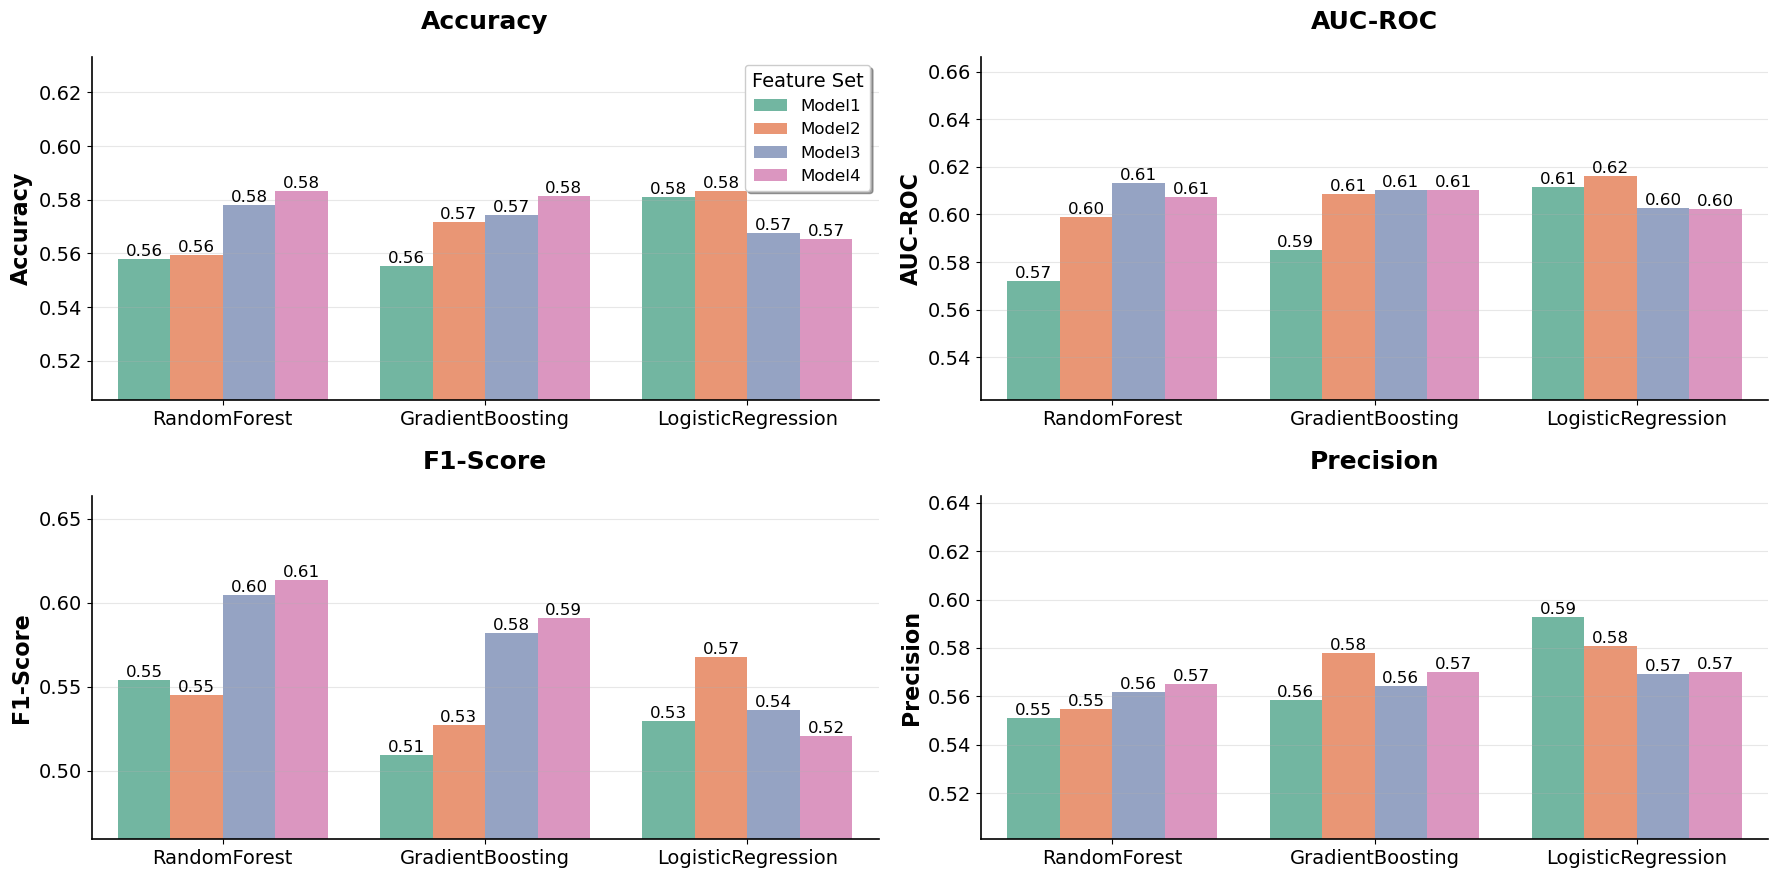


PERFORMANCE SUMMARY TABLE

RandomForest:
Feature_Set  Test_Accuracy  Test_AUC  Test_F1  Test_Precision
     Model1           0.56      0.57     0.55            0.55
     Model2           0.56      0.60     0.55            0.55
     Model3           0.58      0.61     0.60            0.56
     Model4           0.58      0.61     0.61            0.57

GradientBoosting:
Feature_Set  Test_Accuracy  Test_AUC  Test_F1  Test_Precision
     Model1           0.56      0.59     0.51            0.56
     Model2           0.57      0.61     0.53            0.58
     Model3           0.57      0.61     0.58            0.56
     Model4           0.58      0.61     0.59            0.57

LogisticRegression:
Feature_Set  Test_Accuracy  Test_AUC  Test_F1  Test_Precision
     Model1           0.58      0.61     0.53            0.59
     Model2           0.58      0.62     0.57            0.58
     Model3           0.57      0.60     0.54            0.57
     Model4           0.57      0.60     0.52     

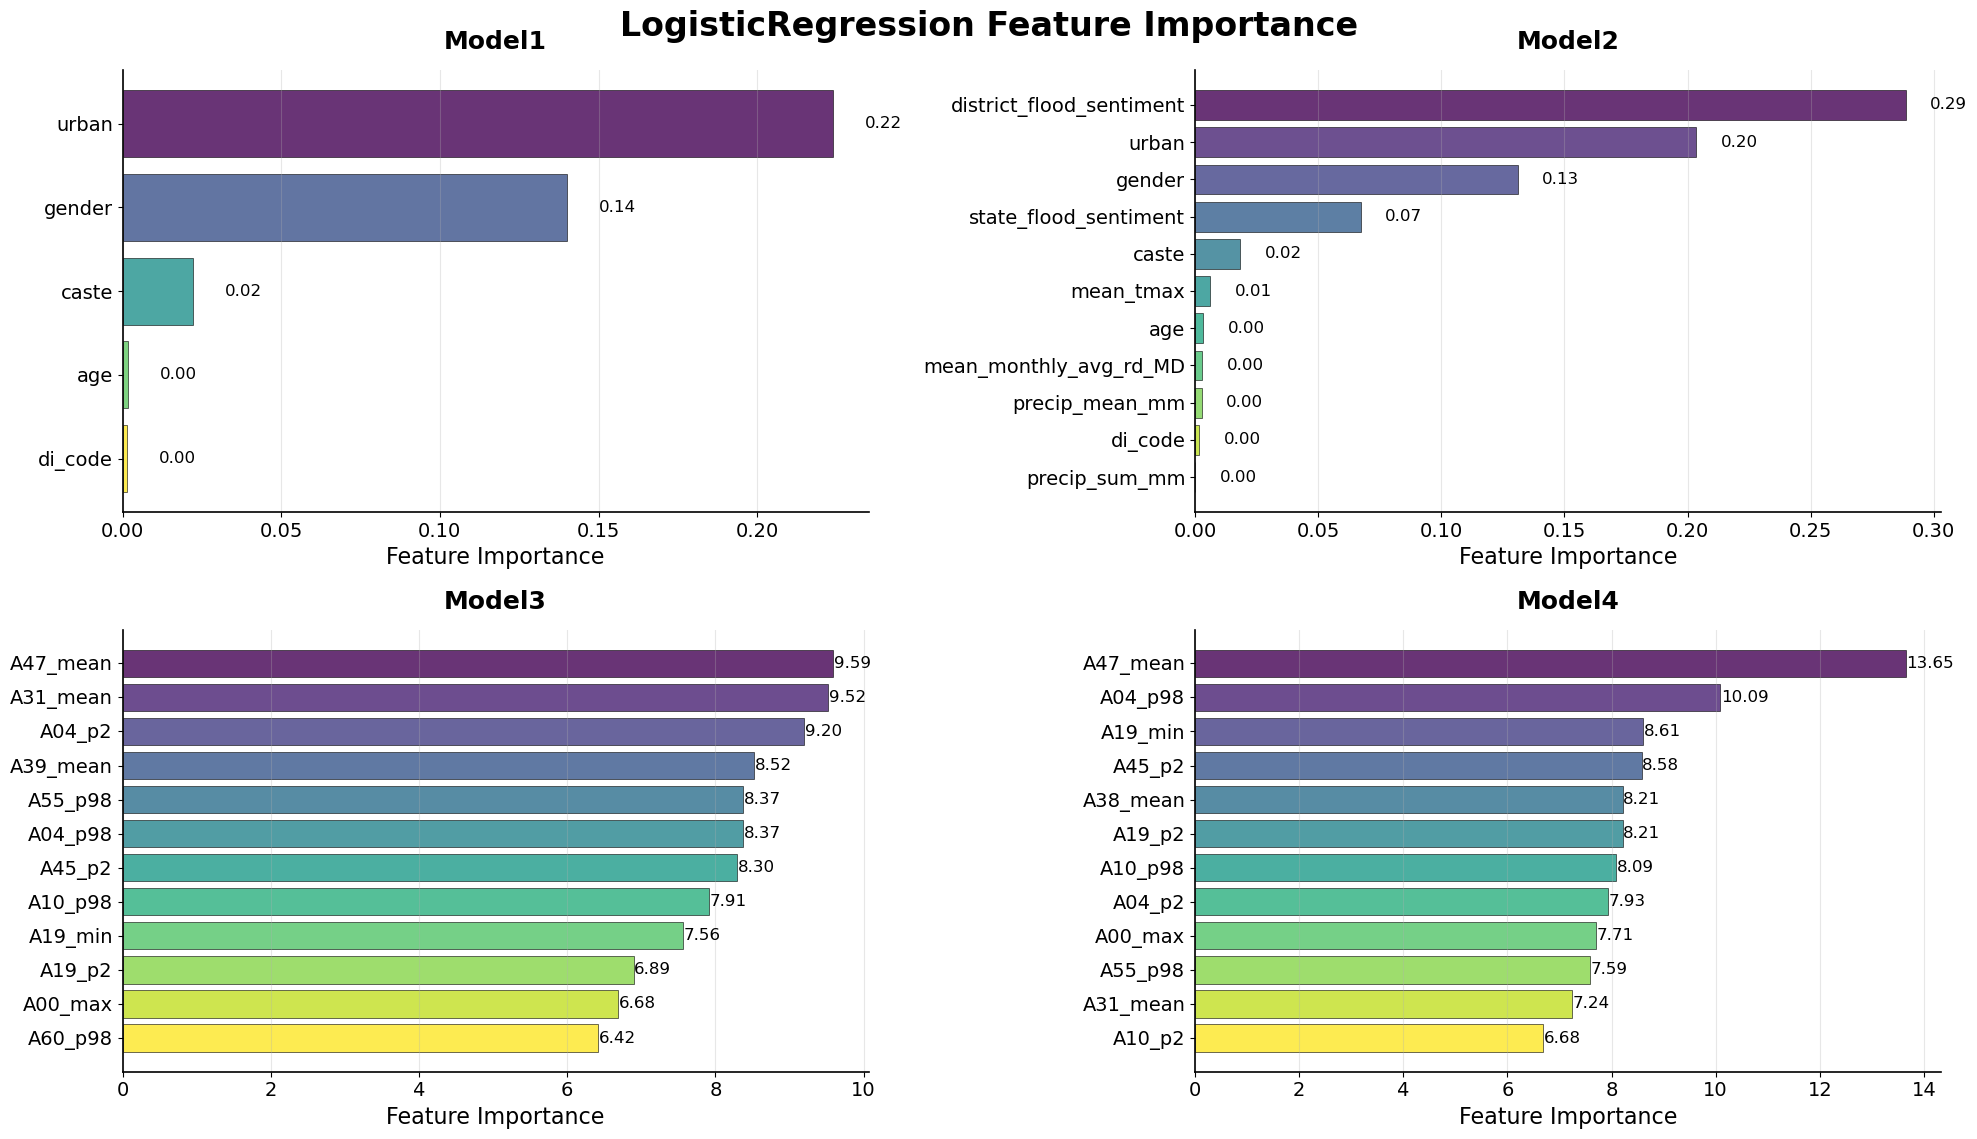

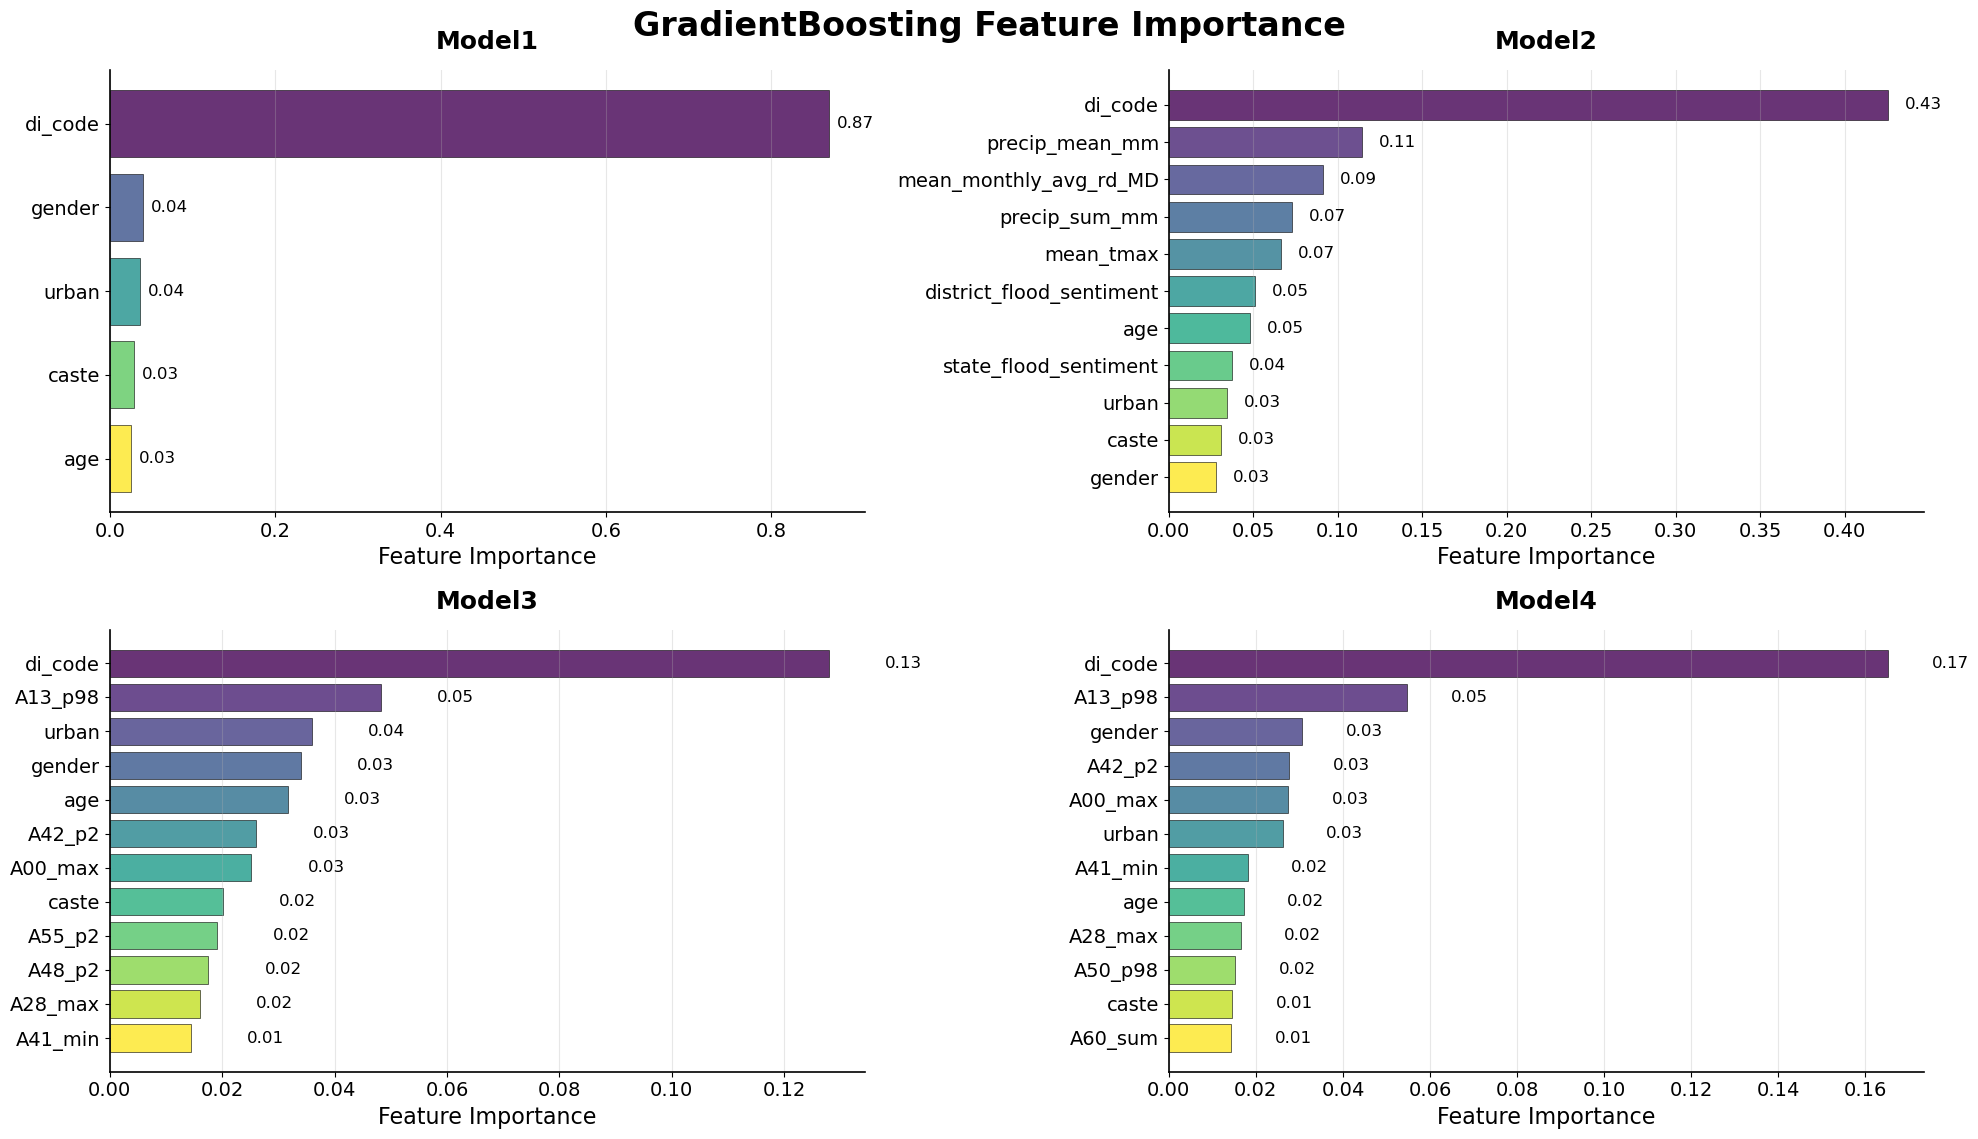

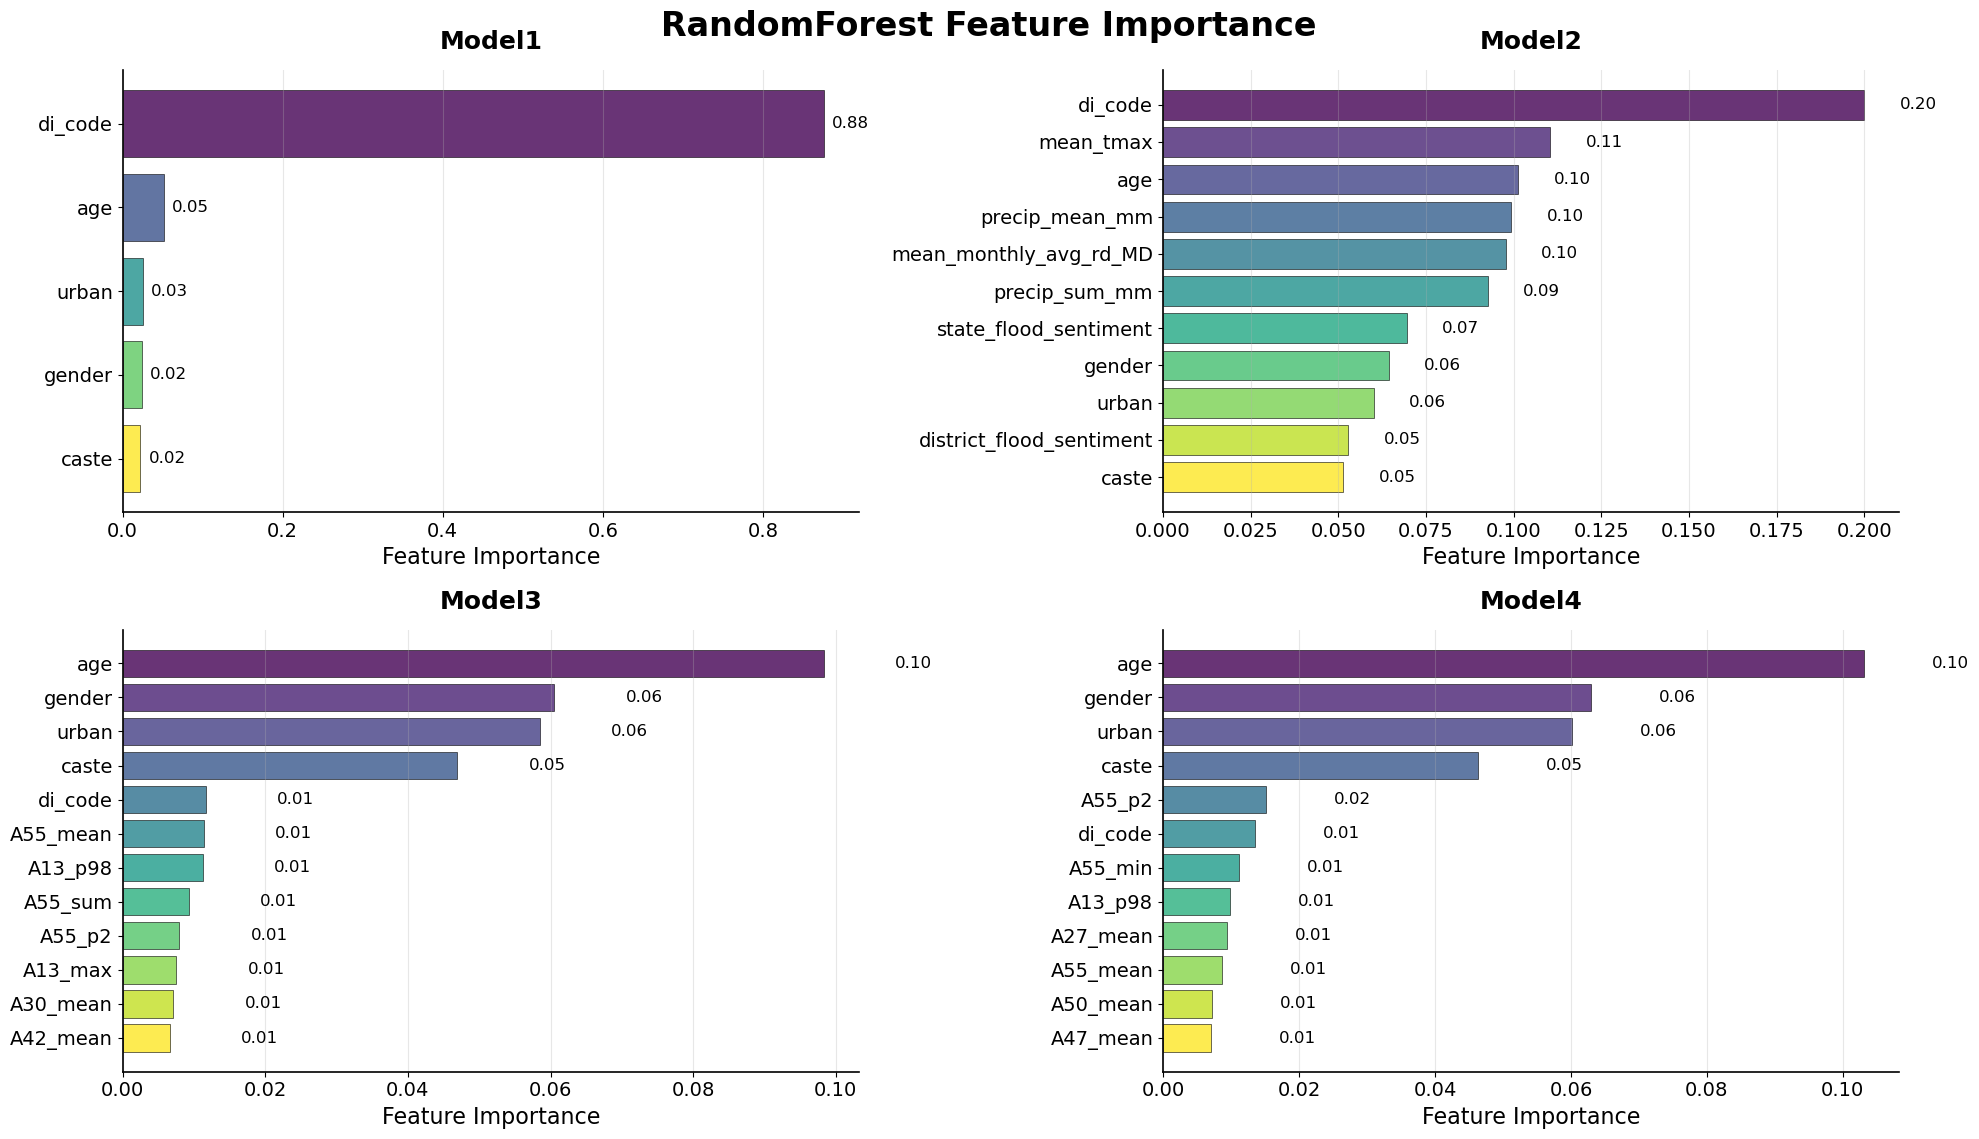

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set professional style
plt.rcParams['font.family'] = 'DejaVu Sans'  # Changed from Arial
plt.rcParams['font.size'] = 14  # Increased base font size
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.spines.top'] = False     # Remove top spine
plt.rcParams['axes.spines.right'] = False   # Remove right spine
sns.set_palette("Set2")

def plot_accuracy_metrics(metrics_list, model_suffixes, save_path=None):
    """
    SLIDE 1: Model Performance Comparison
    Professional accuracy metrics visualization
    """
    
    # Combine data
    combined_data = []
    for metrics_df, suffix in zip(metrics_list, model_suffixes):
        temp_df = metrics_df.copy()
        temp_df['Feature_Set'] = suffix
        combined_data.append(temp_df)
    
    combined_df = pd.concat(combined_data, ignore_index=True)
    
    # Create figure with subplots
    fig, axes = plt.subplots(2, 2, figsize=(18, 9))
    
    # Metrics to plot
    metrics = [
        ('Test_Accuracy', 'Accuracy', axes[0,0]),
        ('Test_AUC', 'AUC-ROC', axes[0,1]),
        ('Test_F1', 'F1-Score', axes[1,0]),
        ('Test_Precision', 'Precision', axes[1,1])
    ]
    
    for metric_col, metric_name, ax in metrics:
        # Create bar plot
        bars = sns.barplot(data=combined_df, x='Model', y=metric_col, hue='Feature_Set', ax=ax)
        
        # Customize appearance
        ax.set_title(f'{metric_name}', fontsize=18, fontweight='bold', pad=20)
        ax.set_xlabel('', fontsize=16, fontweight='bold')  # Removed 'Model Type'
        ax.set_ylabel(metric_name, fontsize=16, fontweight='bold')
        ax.grid(True, alpha=0.3, axis='y')
        
        # Increase tick label sizes
        ax.tick_params(axis='both', which='major', labelsize=14)
        
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Add value labels on bars
        for container in bars.containers:
            bars.bar_label(container, fmt='%.2f', fontsize=12)
        
        # Set consistent y-axis limits for better comparison
        y_min = max(0, combined_df[metric_col].min() - 0.05)
        y_max = min(1, combined_df[metric_col].max() + 0.05)
        ax.set_ylim(y_min, y_max)
        
        # Style legend - move to top right
        if metric_name == 'Accuracy':  # Only show legend once
            ax.legend(title='Feature Set', title_fontsize=14, fontsize=12, 
                     loc='upper right', frameon=True, fancybox=True, shadow=True)
        else:
            ax.get_legend().remove()
    
    plt.tight_layout()
    
    # Save with high DPI if path provided
    if save_path:
        plt.savefig(f'{save_path}_performance.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    
    # Print summary table
    print("\n" + "="*80)
    print("PERFORMANCE SUMMARY TABLE")
    print("="*80)
    
    summary_cols = ['Test_Accuracy', 'Test_AUC', 'Test_F1', 'Test_Precision']
    for model in combined_df['Model'].unique():
        print(f"\n{model}:")
        model_data = combined_df[combined_df['Model'] == model][['Feature_Set'] + summary_cols]
        print(model_data.round(2).to_string(index=False))

def plot_feature_importance(feature_importance_dict, model_suffixes, save_path=None):
    """
    SLIDE 2: Feature Importance Analysis
    Professional feature importance visualization
    """
    
    models = ['LogisticRegression', 'GradientBoosting', 'RandomForest']
    
    for model in models:
        fig, axes = plt.subplots(2, 2, figsize=(20, 12))
        fig.suptitle(f'{model} Feature Importance', 
                     fontsize=24, fontweight='bold', y=0.95)
        axes = axes.flatten()
        
        for i, suffix in enumerate(model_suffixes):
            ax = axes[i]
            
            if suffix in feature_importance_dict and model in feature_importance_dict[suffix]:
                importance_df = feature_importance_dict[suffix][model]
                top_features = importance_df.head(12)  # Show top 12 for better visibility
                
                # Create horizontal bar plot
                colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))
                bars = ax.barh(range(len(top_features)), top_features['Importance'], 
                              color=colors, alpha=0.8, edgecolor='black', linewidth=0.5)
                
                # Customize appearance
                ax.set_yticks(range(len(top_features)))
                ax.set_yticklabels(top_features['Feature'], fontsize=13)
                ax.set_xlabel('Feature Importance', fontsize=16)
                ax.set_title(f'{suffix}', fontsize=18, fontweight='bold', pad=15)
                ax.invert_yaxis()
                ax.grid(True, alpha=0.3, axis='x')
                
                # Increase tick label sizes
                ax.tick_params(axis='both', which='major', labelsize=14)
                
                # Remove top and right spines
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
                
                # Add value labels on bars
                for j, bar in enumerate(bars):
                    width = bar.get_width()
                    ax.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                           f'{width:.2f}', ha='left', va='center', 
                           fontsize=12)
                
                # Removed ranking numbers as requested
                
            else:
                ax.text(0.5, 0.5, f'No data available\nfor {suffix}', 
                       transform=ax.transAxes, ha='center', va='center', 
                       fontsize=16, fontweight='bold', color='gray')
                ax.set_title(f'{suffix}', fontsize=18)
                # Remove spines for empty plots too
                ax.spines['top'].set_visible(False)
                ax.spines['right'].set_visible(False)
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        
        # Save with high DPI if path provided
        if save_path:
            plt.savefig(f'{save_path}_{model}_importance.png', dpi=300, bbox_inches='tight')
        
        plt.show()


# Create plots
metrics_list = [metrics1, metrics2, metrics3, metrics4]
model_suffixes = ['Model1', 'Model2', 'Model3', 'Model4']
feature_importance_dict = {
    'Model1': importance1,
    'Model2': importance2, 
    'Model3': importance3,
    'Model4': importance4
}

# SLIDE 1: Performance Metrics (saves as 'plots_performance.png')
plot_accuracy_metrics(metrics_list, model_suffixes, save_path='plots')

# SLIDE 2: Feature Importance (saves as 'plots_RandomForest_importance.png', etc.)
plot_feature_importance(feature_importance_dict, model_suffixes, save_path='plots')